In [1]:
import trimesh
import plotly.graph_objects as go

from DDV import eigenbasis, kernel

C:\Users\mg874\anaconda3\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [19]:
def plot_mesh_with_vecs_go(mesh, vecs, title='', scale=5, camera=None, cb=False):
    mesh_plot = go.Mesh3d(
        x=mesh.vertices[:, 0],
        y=mesh.vertices[:, 1],
        z=mesh.vertices[:, 2],
        i=mesh.faces[:, 0],
        j=mesh.faces[:, 1],
        k=mesh.faces[:, 2],
        color='rgba(210,210,210,1.0)',
        # opacity=0.75,
    )

    normal_cones = go.Cone(
        x=mesh.vertices[:, 0],
        y=mesh.vertices[:, 1],
        z=mesh.vertices[:, 2],
        u=vecs[:, 0],
        v=vecs[:, 1],
        w=vecs[:, 2],
        sizemode="scaled",
        sizeref=scale,
        anchor="tail",
        showscale=cb
    )
    
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X', showbackground=False, showgrid=False, zeroline=False, visible=False),
            yaxis=dict(title='Y', showbackground=False, showgrid=False, zeroline=False, visible=False),
            zaxis=dict(title='Z', showbackground=False, showgrid=False, zeroline=False, visible=False),
            aspectmode='data'
        ),
        title=title,
        showlegend=False,
        autosize=False,
        width=1000,
        height=1000,
    )
    
    
    fig = go.Figure(data=[mesh_plot, normal_cones], layout=layout)

    fig.update_layout(
        margin={'t':0,'l':0,'b':0,'r':0}
    )

    if camera is not None:
        fig.update_layout(scene_camera=camera)
        
    return fig

In [3]:
bunny_mesh = trimesh.load("../data/bunny10000.ply")

In [4]:
bunny_eigs, bunny_d_vert_vecs, bunny_c_vert_vecs, bunny_vol, bunny_complex = eigenbasis.generate_vector_basis(bunny_mesh.vertices, bunny_mesh.faces, flat=True)

Processing eigenvectors:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
bunny_params = {
    "k_d": 2,
    "k_c": 100,
    "s_d": 1,
    "s_c": 10,
    "v": 0.5
}

bunny_samp = kernel.sample_vector_field(bunny_eigs[1:], bunny_d_vert_vecs[:, :, 1:], bunny_c_vert_vecs[:, :, 1:], 3, bunny_vol, bunny_params)

Processing eigenvectors:   0%|          | 0/100 [00:03<?, ?it/s]


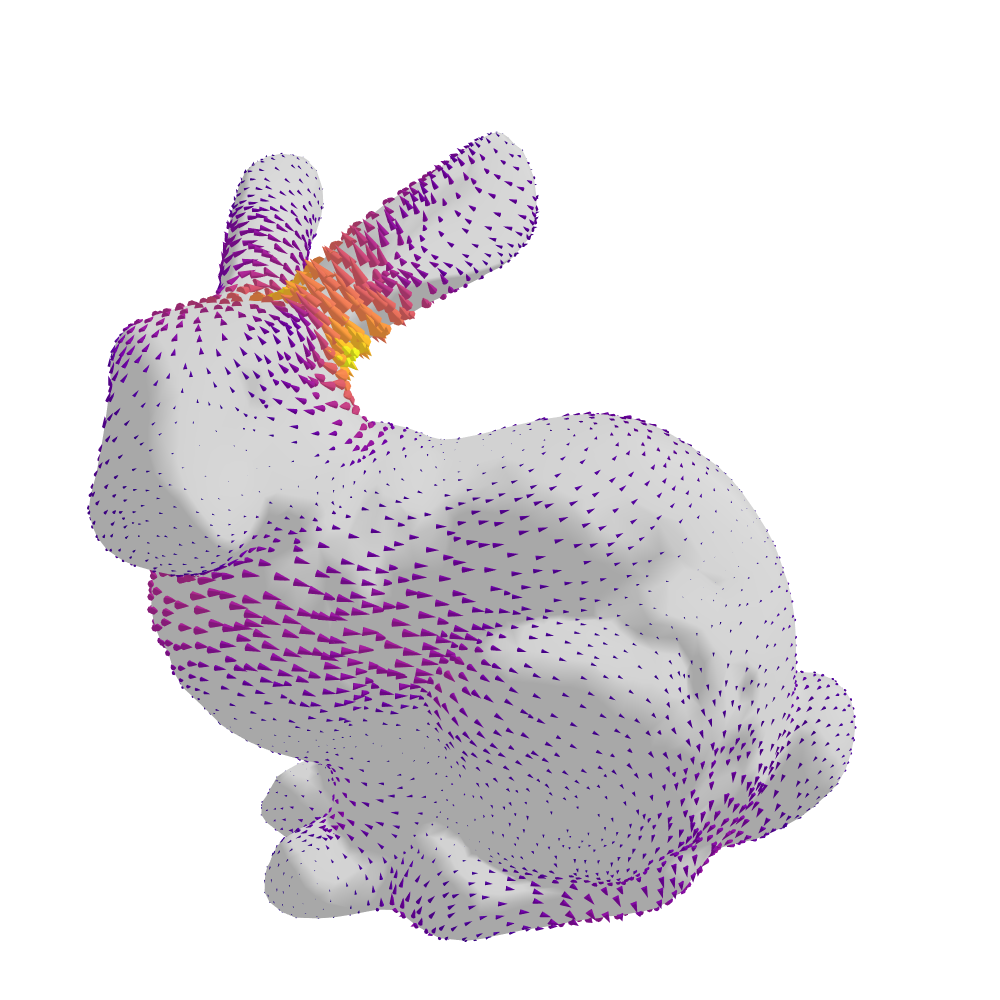

In [6]:
camera = dict(
    up=dict(x=0, y=1, z=0),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=0, y=.5, z=1.5)
)

fig = plot_mesh_with_vecs_go(bunny_mesh, bunny_samp, camera=camera, scale=6)
# fig.write_image("plots/bunny.png", format='png')
fig.show(renderer="png")

In [7]:
sph_mesh = trimesh.creation.icosphere(subdivisions=4, radius=50.0)

sph_eigs, sph_d_vert_vecs, sph_c_vert_vecs, sph_vol, sph_complex = eigenbasis.generate_vector_basis(sph_mesh.vertices, sph_mesh.faces, flat=False)

Processing eigenvectors:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

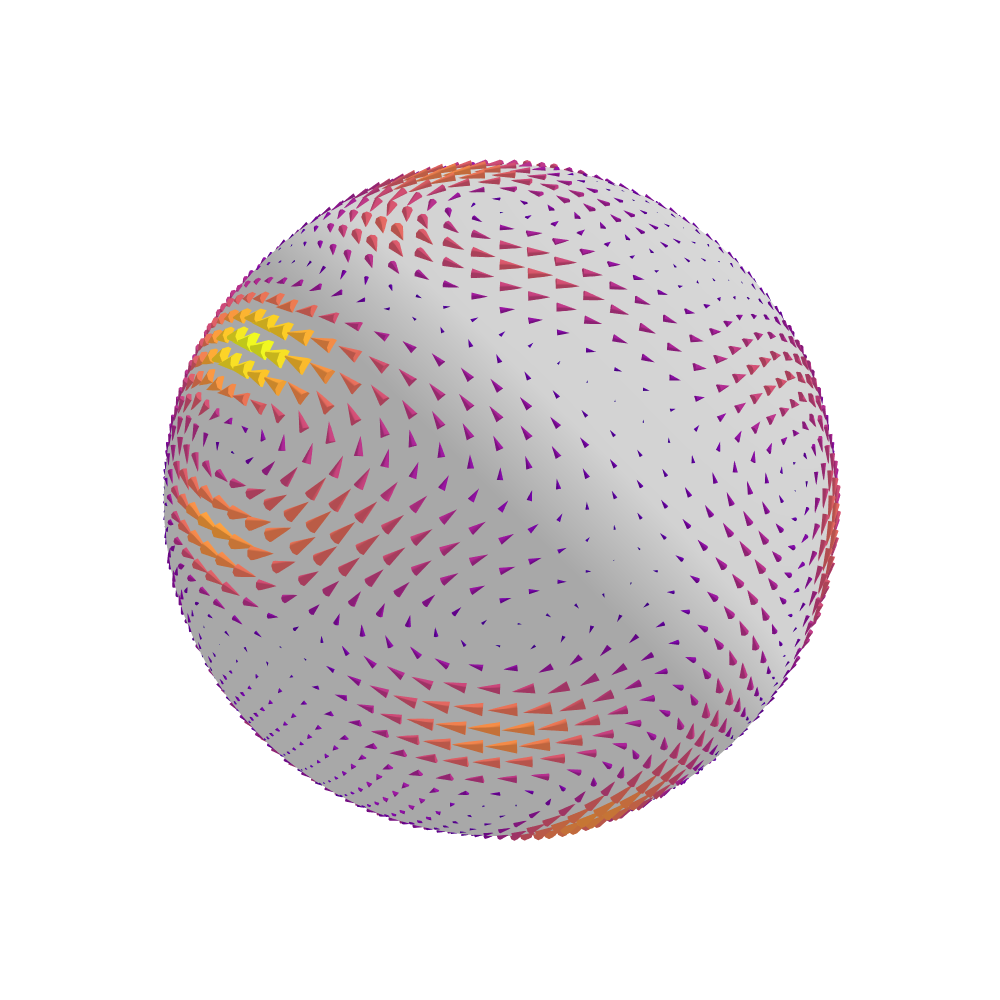

In [8]:
sph_params = {
    "k_d": 1,
    "k_c": 5,
    "s_d": 1,
    "s_c": 4,
    "v": 0.5
}

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=0, y=.5, z=1.5)
)

sph_samp = kernel.sample_vector_field(sph_eigs[1:], sph_d_vert_vecs[:, :, 1:], sph_c_vert_vecs[:, :, 1:], 3, sph_vol, sph_params)

fig = plot_mesh_with_vecs_go(sph_mesh, sph_samp, camera=camera, scale=1)
# fig.write_image("plots/sph.png", format='png')

fig.show(renderer='png')

In [9]:
tor_mesh = trimesh.creation.torus(major_radius=1.0, minor_radius=0.4, minor_sections=24, major_sections=96)

tor_eigs, tor_d_vert_vecs, tor_c_vert_vecs, tor_vol, tor_complex = eigenbasis.generate_vector_basis(tor_mesh.vertices, tor_mesh.faces, flat=False)

tor_harms = eigenbasis.generate_harmonic_basis(tor_complex, dim=3)

Processing eigenvectors:   0%|          | 0/100 [00:02<?, ?it/s]
C:\Users\mg874\anaconda3\Lib\site-packages\pydec\dec\simplicial_complex.py:177: RuntimeWarning:

divide by zero encountered in divide

Processing eigenvectors:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

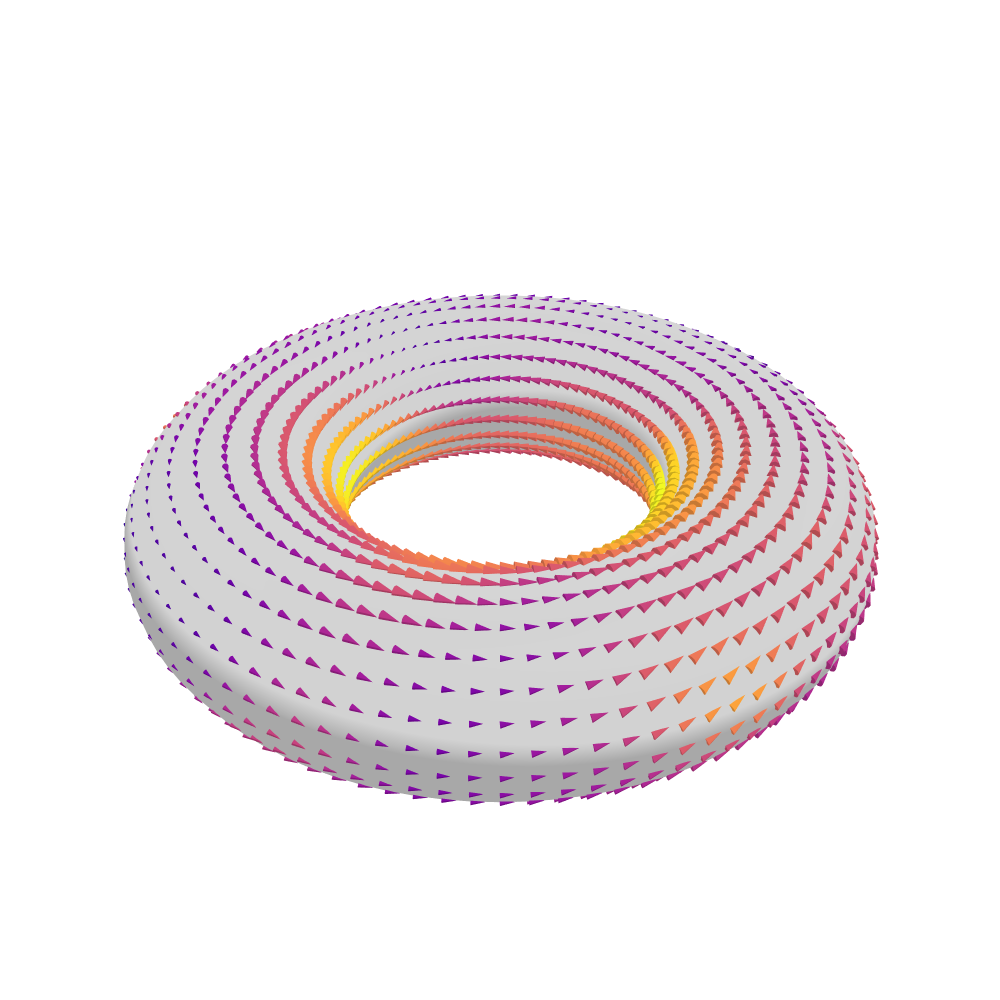

In [10]:
tor_params = {
    "k_d": 2,
    "k_c": 5,
    "s_d": 1,
    "s_c": 1,
    "s_h": 10,
    "v": 0.5
}

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=0, y=.5, z=1.5)
)

tor_samp = kernel.sample_vector_field(tor_eigs[1:], tor_d_vert_vecs[:, :, 1:], tor_c_vert_vecs[:, :, 1:], 3, tor_vol, tor_params, h_eigenfield=tor_harms)

fig = plot_mesh_with_vecs_go(tor_mesh, tor_samp, scale=0.8)
# fig.write_image("plots/torus.png", format='png')
fig.show(renderer='png')

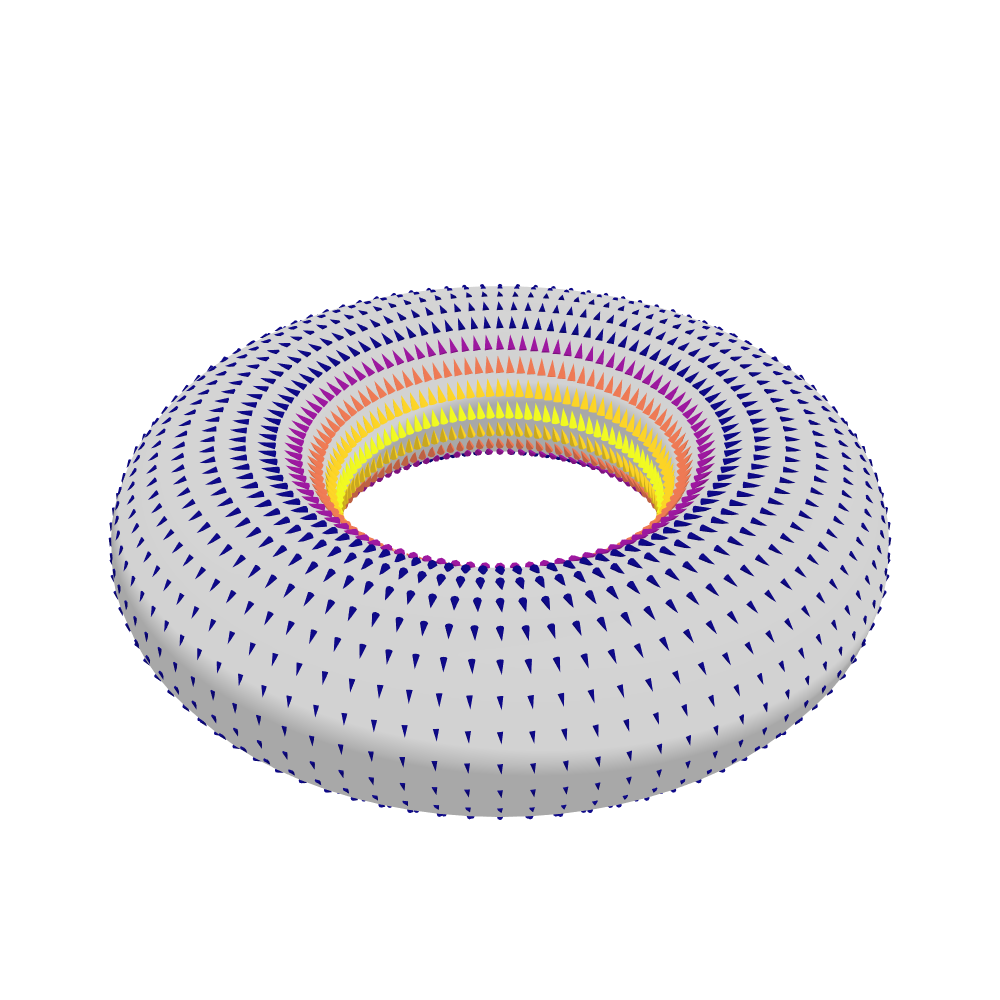

In [11]:
fig = plot_mesh_with_vecs_go(tor_mesh, tor_harms[:, :, 0], scale=0.8)
# fig.write_image("plots/torus_harmonic1.png", format='png')
fig.show(renderer='png')

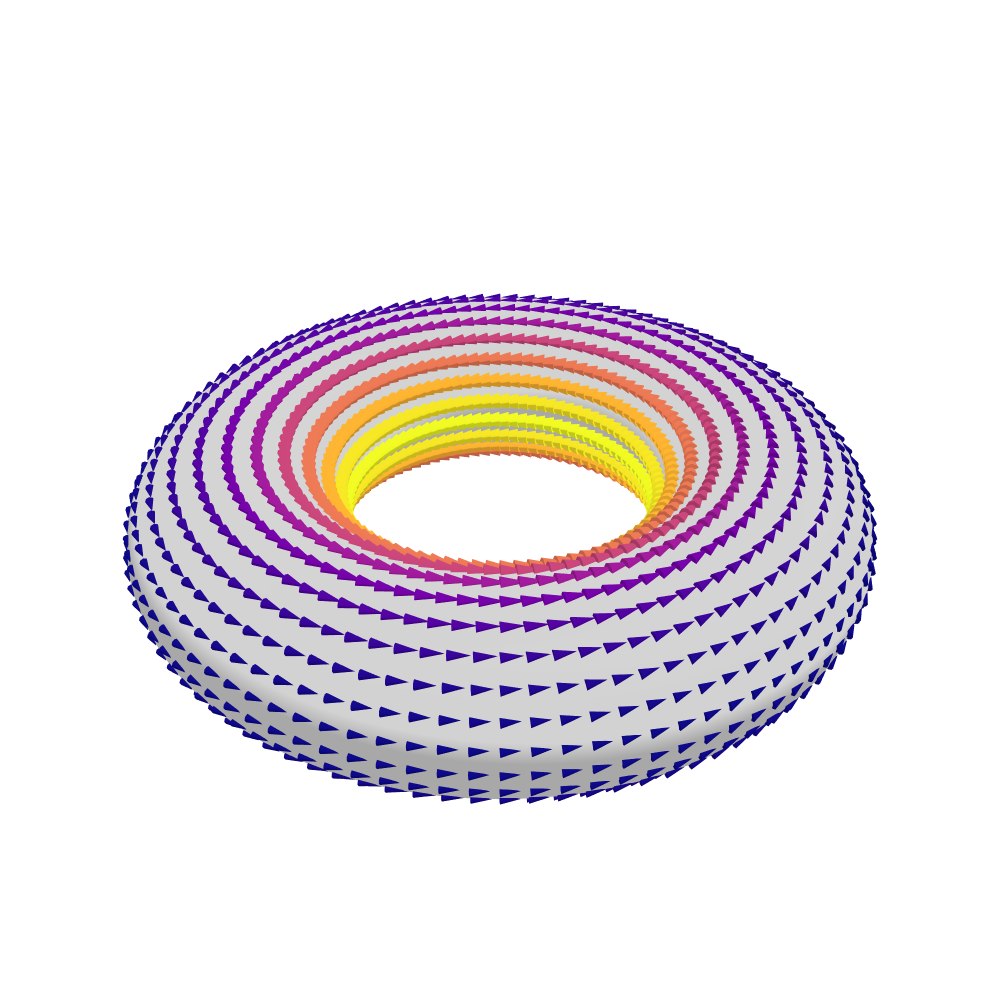

In [12]:
fig = plot_mesh_with_vecs_go(tor_mesh, tor_harms[:, :, 1], scale=0.8)
# fig.write_image("plots/torus_harmonic2.png", format='png')
fig.show(renderer='png')